In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, StandardScaler, Normalizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython import display
from wordcloud import WordCloud

In [2]:
df_artists = pd.read_csv('artists.csv', index_col='artist',
                         converters={'genres': literal_eval, 'albums': literal_eval,
                                     'related_artists':literal_eval, 'related_genres':literal_eval})

## Data wrangling

Impute empty genres with related genres

In [3]:
df_artists.loc[df_artists['genres'].apply(lambda x: len(x) == 0), 'genres'] =\
df_artists['related_genres'].apply(lambda x: list(set(x)))

In [4]:
mlb = MultiLabelBinarizer()
mlb.fit(df_artists['genres'])

MultiLabelBinarizer(classes=None, sparse_output=False)

One-hot encode genres

In [5]:
df_genres = pd.DataFrame(data=mlb.transform(df_artists['genres']), 
                         columns=['genre: {}'.format(genre) for genre in mlb.classes_],
                         index=df_artists.index)

In [6]:
df_artists = df_artists.join(df_genres)
df_artists.head()

artist_id  followers  \
artist                                                       
Travis Scott             0Y5tJX1MQlPlqiwlOH1tJY    7705985   
Martin Garrix            60d24wfXkVzDSfLS6hyCjZ   12574151   
Los Fabulosos Cadillacs  2FS22haX3FYbyOsUAkuYqZ    1672897   
Brockhampton             1Bl6wpkWCQ4KVgnASpvzzA    1186410   
DUKI                     1bAftSH8umNcGZ0uyV7LMg    2715207   

                                                                    genres  \
artist                                                                       
Travis Scott                                                         [rap]   
Martin Garrix            [big room, edm, pop, progressive house, tropic...   
Los Fabulosos Cadillacs  [argentine rock, latin alternative, latin rock...   
Brockhampton                                 [boy band, hip hop, pop, rap]   
DUKI                                   [argentine hip hop, trap argentino]   

                         popularity  \
artist                                
Travis Scott                     98   
Martin Garrix                    88   
Los Fabulosos Cadillacs          73   
Brockhampton                     85   
DUKI                             84   

                                                                    albums  \
artist                                                                       
Travis Scott             {'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...   
Martin Garrix            {'2019-07-10': 'The Martin Garrix Experience',...   
Los Fabulosos Cadillacs  {'2017-10-20': 'En Vivo en The Theater at Madi...   
Brockhampton             {'2019-08-23': 'GINGER', '2018-09-21': 'irides...   
DUKI                     {'2019-11-01': 'Súper Sangre Joven', '2020-01-...   

                                                                top_tracks  \
artist                                                                       
Travis Scott             ['3eekarcy7kvN4yt5ZFzltW', '7h0d2h0fUmzbs7zeFi...   
Martin Garrix            ['7Feaw9WAEREY0DUOSXJLOM', '7pWK1kMgHy5lNNiIfu...   
Los Fabulosos Cadillacs  ['198qSChSMQFuSimdeeY9gK', '7d4pdMym8ZBOgf1oVP...   
Brockhampton             ['6U0FIYXCQ3TGrk4tFpLrEA', '0dWOFwdXrbBUYqD9DL...   
DUKI                     ['57kdZIOAaolxAjB67d2yU3', '2ECIwi1a7mfokdDkkJ...   

                                                           related_artists  \
artist                                                                       
Travis Scott             [A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...   
Martin Garrix            [AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...   
Los Fabulosos Cadillacs  [Los Pericos, Vicentico, Aterciopelados, Los A...   
Brockhampton             [Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...   
DUKI                     [Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...   

                                                            related_genres  \
artist                                                                       
Travis Scott             [east coast hip hop, hip hop, pop rap, rap, tr...   
Martin Garrix            [big room, edm, big room, deep big room, edm, ...   
Los Fabulosos Cadillacs  [argentine reggae, argentine rock, latin alter...   
Brockhampton             [alternative r&b, hip hop, lgbtq+ hip hop, rap...   
DUKI                     [argentine hip hop, trap argentino, argentine ...   

                         day  genre: alternative r&b  ...  \
artist                                                ...   
Travis Scott               1                       0  ...   
Martin Garrix              1                       0  ...   
Los Fabulosos Cadillacs    1                       0  ...   
Brockhampton               1                       0  ...   
DUKI                       1                       0  ...   

                         genre: trap argentino  genre: trap chileno  \
artist                                                                
Travis Scott            

One-hot encode related artists

In [7]:
mlb.fit(df_artists['related_artists'])
df_related_artists = pd.DataFrame(data=mlb.transform(df_artists['related_artists']), 
                                  columns=['related_artist: {}'.format(related_artist)
                                                                for related_artist in mlb.classes_],
                                  index=df_artists.index)

In [8]:
df_artists = df_artists.join(df_related_artists)
df_artists.head()

artist_id  followers  \
artist                                                       
Travis Scott             0Y5tJX1MQlPlqiwlOH1tJY    7705985   
Martin Garrix            60d24wfXkVzDSfLS6hyCjZ   12574151   
Los Fabulosos Cadillacs  2FS22haX3FYbyOsUAkuYqZ    1672897   
Brockhampton             1Bl6wpkWCQ4KVgnASpvzzA    1186410   
DUKI                     1bAftSH8umNcGZ0uyV7LMg    2715207   

                                                                    genres  \
artist                                                                       
Travis Scott                                                         [rap]   
Martin Garrix            [big room, edm, pop, progressive house, tropic...   
Los Fabulosos Cadillacs  [argentine rock, latin alternative, latin rock...   
Brockhampton                                 [boy band, hip hop, pop, rap]   
DUKI                                   [argentine hip hop, trap argentino]   

                         popularity  \
artist                                
Travis Scott                     98   
Martin Garrix                    88   
Los Fabulosos Cadillacs          73   
Brockhampton                     85   
DUKI                             84   

                                                                    albums  \
artist                                                                       
Travis Scott             {'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...   
Martin Garrix            {'2019-07-10': 'The Martin Garrix Experience',...   
Los Fabulosos Cadillacs  {'2017-10-20': 'En Vivo en The Theater at Madi...   
Brockhampton             {'2019-08-23': 'GINGER', '2018-09-21': 'irides...   
DUKI                     {'2019-11-01': 'Súper Sangre Joven', '2020-01-...   

                                                                top_tracks  \
artist                                                                       
Travis Scott             ['3eekarcy7kvN4yt5ZFzltW', '7h0d2h0fUmzbs7zeFi...   
Martin Garrix            ['7Feaw9WAEREY0DUOSXJLOM', '7pWK1kMgHy5lNNiIfu...   
Los Fabulosos Cadillacs  ['198qSChSMQFuSimdeeY9gK', '7d4pdMym8ZBOgf1oVP...   
Brockhampton             ['6U0FIYXCQ3TGrk4tFpLrEA', '0dWOFwdXrbBUYqD9DL...   
DUKI                     ['57kdZIOAaolxAjB67d2yU3', '2ECIwi1a7mfokdDkkJ...   

                                                           related_artists  \
artist                                                                       
Travis Scott             [A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...   
Martin Garrix            [AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...   
Los Fabulosos Cadillacs  [Los Pericos, Vicentico, Aterciopelados, Los A...   
Brockhampton             [Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...   
DUKI                     [Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...   

                                                            related_genres  \
artist                                                                       
Travis Scott             [east coast hip hop, hip hop, pop rap, rap, tr...   
Martin Garrix            [big room, edm, big room, deep big room, edm, ...   
Los Fabulosos Cadillacs  [argentine reggae, argentine rock, latin alter...   
Brockhampton             [alternative r&b, hip hop, lgbtq+ hip hop, rap...   
DUKI                     [argentine hip hop, trap argentino, argentine ...   

                         day  genre: alternative r&b  ...  \
artist                                                ...   
Travis Scott               1                       0  ...   
Martin Garrix              1                       0  ...   
Los Fabulosos Cadillacs    1                       0  ...   
Brockhampton               1                       0  ...   
DUKI                       1                       0  ...   

                         related_artist: lovelytheband  related_artist: sfam  \
artist                                                                         
Travis

Weight related genres

In [9]:
df_related_genres = df_artists['related_genres'].apply(lambda x: pd.Series(x).value_counts())
df_related_genres.columns = ['related_genre: '+c for c in df_related_genres.columns]
df_related_genres.fillna(0, inplace=True)

In [10]:
df_artists = df_artists.join(df_related_genres)
df_artists.head()

artist_id  followers  \
artist                                                       
Travis Scott             0Y5tJX1MQlPlqiwlOH1tJY    7705985   
Martin Garrix            60d24wfXkVzDSfLS6hyCjZ   12574151   
Los Fabulosos Cadillacs  2FS22haX3FYbyOsUAkuYqZ    1672897   
Brockhampton             1Bl6wpkWCQ4KVgnASpvzzA    1186410   
DUKI                     1bAftSH8umNcGZ0uyV7LMg    2715207   

                                                                    genres  \
artist                                                                       
Travis Scott                                                         [rap]   
Martin Garrix            [big room, edm, pop, progressive house, tropic...   
Los Fabulosos Cadillacs  [argentine rock, latin alternative, latin rock...   
Brockhampton                                 [boy band, hip hop, pop, rap]   
DUKI                                   [argentine hip hop, trap argentino]   

                         popularity  \
artist                                
Travis Scott                     98   
Martin Garrix                    88   
Los Fabulosos Cadillacs          73   
Brockhampton                     85   
DUKI                             84   

                                                                    albums  \
artist                                                                       
Travis Scott             {'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...   
Martin Garrix            {'2019-07-10': 'The Martin Garrix Experience',...   
Los Fabulosos Cadillacs  {'2017-10-20': 'En Vivo en The Theater at Madi...   
Brockhampton             {'2019-08-23': 'GINGER', '2018-09-21': 'irides...   
DUKI                     {'2019-11-01': 'Súper Sangre Joven', '2020-01-...   

                                                                top_tracks  \
artist                                                                       
Travis Scott             ['3eekarcy7kvN4yt5ZFzltW', '7h0d2h0fUmzbs7zeFi...   
Martin Garrix            ['7Feaw9WAEREY0DUOSXJLOM', '7pWK1kMgHy5lNNiIfu...   
Los Fabulosos Cadillacs  ['198qSChSMQFuSimdeeY9gK', '7d4pdMym8ZBOgf1oVP...   
Brockhampton             ['6U0FIYXCQ3TGrk4tFpLrEA', '0dWOFwdXrbBUYqD9DL...   
DUKI                     ['57kdZIOAaolxAjB67d2yU3', '2ECIwi1a7mfokdDkkJ...   

                                                           related_artists  \
artist                                                                       
Travis Scott             [A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...   
Martin Garrix            [AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...   
Los Fabulosos Cadillacs  [Los Pericos, Vicentico, Aterciopelados, Los A...   
Brockhampton             [Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...   
DUKI                     [Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...   

                                                            related_genres  \
artist                                                                       
Travis Scott             [east coast hip hop, hip hop, pop rap, rap, tr...   
Martin Garrix            [big room, edm, big room, deep big room, edm, ...   
Los Fabulosos Cadillacs  [argentine reggae, argentine rock, latin alter...   
Brockhampton             [alternative r&b, hip hop, lgbtq+ hip hop, rap...   
DUKI                     [argentine hip hop, trap argentino, argentine ...   

                         day  genre: alternative r&b  ...  \
artist                                                ...   
Travis Scott               1                       0  ...   
Martin Garrix              1                       0  ...   
Los Fabulosos Cadillacs    1                       0  ...   
Brockhampton               1                       0  ...   
DUKI                       1                       0  ...   

                         related_genre: minimal tech house  \
artist                                                       
Travis Scott                              

One-hot encode argentinian artists

In [11]:
is_argentinian = pd.read_csv('is_argentinian.csv', index_col='artist')

In [12]:
df_artists = df_artists.join(is_argentinian)
df_artists.head()

artist_id  followers  \
artist                                                       
Travis Scott             0Y5tJX1MQlPlqiwlOH1tJY    7705985   
Martin Garrix            60d24wfXkVzDSfLS6hyCjZ   12574151   
Los Fabulosos Cadillacs  2FS22haX3FYbyOsUAkuYqZ    1672897   
Brockhampton             1Bl6wpkWCQ4KVgnASpvzzA    1186410   
DUKI                     1bAftSH8umNcGZ0uyV7LMg    2715207   

                                                                    genres  \
artist                                                                       
Travis Scott                                                         [rap]   
Martin Garrix            [big room, edm, pop, progressive house, tropic...   
Los Fabulosos Cadillacs  [argentine rock, latin alternative, latin rock...   
Brockhampton                                 [boy band, hip hop, pop, rap]   
DUKI                                   [argentine hip hop, trap argentino]   

                         popularity  \
artist                                
Travis Scott                     98   
Martin Garrix                    88   
Los Fabulosos Cadillacs          73   
Brockhampton                     85   
DUKI                             84   

                                                                    albums  \
artist                                                                       
Travis Scott             {'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...   
Martin Garrix            {'2019-07-10': 'The Martin Garrix Experience',...   
Los Fabulosos Cadillacs  {'2017-10-20': 'En Vivo en The Theater at Madi...   
Brockhampton             {'2019-08-23': 'GINGER', '2018-09-21': 'irides...   
DUKI                     {'2019-11-01': 'Súper Sangre Joven', '2020-01-...   

                                                                top_tracks  \
artist                                                                       
Travis Scott             ['3eekarcy7kvN4yt5ZFzltW', '7h0d2h0fUmzbs7zeFi...   
Martin Garrix            ['7Feaw9WAEREY0DUOSXJLOM', '7pWK1kMgHy5lNNiIfu...   
Los Fabulosos Cadillacs  ['198qSChSMQFuSimdeeY9gK', '7d4pdMym8ZBOgf1oVP...   
Brockhampton             ['6U0FIYXCQ3TGrk4tFpLrEA', '0dWOFwdXrbBUYqD9DL...   
DUKI                     ['57kdZIOAaolxAjB67d2yU3', '2ECIwi1a7mfokdDkkJ...   

                                                           related_artists  \
artist                                                                       
Travis Scott             [A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...   
Martin Garrix            [AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...   
Los Fabulosos Cadillacs  [Los Pericos, Vicentico, Aterciopelados, Los A...   
Brockhampton             [Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...   
DUKI                     [Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...   

                                                            related_genres  \
artist                                                                       
Travis Scott             [east coast hip hop, hip hop, pop rap, rap, tr...   
Martin Garrix            [big room, edm, big room, deep big room, edm, ...   
Los Fabulosos Cadillacs  [argentine reggae, argentine rock, latin alter...   
Brockhampton             [alternative r&b, hip hop, lgbtq+ hip hop, rap...   
DUKI                     [argentine hip hop, trap argentino, argentine ...   

                         day  genre: alternative r&b  ...  \
artist                                                ...   
Travis Scott               1                       0  ...   
Martin Garrix              1                       0  ...   
Los Fabulosos Cadillacs    1                       0  ...   
Brockhampton               1                       0  ...   
DUKI                       1                       0  ...   

                         related_genre: bboy  related_genre: electro swing  \
artist                                                                       
Travis Sco

Year of the first release

In [13]:
first_release = lambda x: pd.DatetimeIndex(pd.Series(df_artists.loc[x]['albums']).index).min().year

In [14]:
df_artists['first_release'] = df_artists.index.map(first_release)
df_artists.head()

artist_id  followers  \
artist                                                       
Travis Scott             0Y5tJX1MQlPlqiwlOH1tJY    7705985   
Martin Garrix            60d24wfXkVzDSfLS6hyCjZ   12574151   
Los Fabulosos Cadillacs  2FS22haX3FYbyOsUAkuYqZ    1672897   
Brockhampton             1Bl6wpkWCQ4KVgnASpvzzA    1186410   
DUKI                     1bAftSH8umNcGZ0uyV7LMg    2715207   

                                                                    genres  \
artist                                                                       
Travis Scott                                                         [rap]   
Martin Garrix            [big room, edm, pop, progressive house, tropic...   
Los Fabulosos Cadillacs  [argentine rock, latin alternative, latin rock...   
Brockhampton                                 [boy band, hip hop, pop, rap]   
DUKI                                   [argentine hip hop, trap argentino]   

                         popularity  \
artist                                
Travis Scott                     98   
Martin Garrix                    88   
Los Fabulosos Cadillacs          73   
Brockhampton                     85   
DUKI                             84   

                                                                    albums  \
artist                                                                       
Travis Scott             {'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...   
Martin Garrix            {'2019-07-10': 'The Martin Garrix Experience',...   
Los Fabulosos Cadillacs  {'2017-10-20': 'En Vivo en The Theater at Madi...   
Brockhampton             {'2019-08-23': 'GINGER', '2018-09-21': 'irides...   
DUKI                     {'2019-11-01': 'Súper Sangre Joven', '2020-01-...   

                                                                top_tracks  \
artist                                                                       
Travis Scott             ['3eekarcy7kvN4yt5ZFzltW', '7h0d2h0fUmzbs7zeFi...   
Martin Garrix            ['7Feaw9WAEREY0DUOSXJLOM', '7pWK1kMgHy5lNNiIfu...   
Los Fabulosos Cadillacs  ['198qSChSMQFuSimdeeY9gK', '7d4pdMym8ZBOgf1oVP...   
Brockhampton             ['6U0FIYXCQ3TGrk4tFpLrEA', '0dWOFwdXrbBUYqD9DL...   
DUKI                     ['57kdZIOAaolxAjB67d2yU3', '2ECIwi1a7mfokdDkkJ...   

                                                           related_artists  \
artist                                                                       
Travis Scott             [A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...   
Martin Garrix            [AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...   
Los Fabulosos Cadillacs  [Los Pericos, Vicentico, Aterciopelados, Los A...   
Brockhampton             [Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...   
DUKI                     [Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...   

                                                            related_genres  \
artist                                                                       
Travis Scott             [east coast hip hop, hip hop, pop rap, rap, tr...   
Martin Garrix            [big room, edm, big room, deep big room, edm, ...   
Los Fabulosos Cadillacs  [argentine reggae, argentine rock, latin alter...   
Brockhampton             [alternative r&b, hip hop, lgbtq+ hip hop, rap...   
DUKI                     [argentine hip hop, trap argentino, argentine ...   

                         day  genre: alternative r&b  ...  \
artist                                                ...   
Travis Scott               1                       0  ...   
Martin Garrix              1                       0  ...   
Los Fabulosos Cadillacs    1                       0  ...   
Brockhampton               1                       0  ...   
DUKI                       1                       0  ...   

                         related_genre: electro swing  \
artist                                                  
Travis Scott                                      0.

---

## Exploratory Data Analysis

Quantity of artists per day

In [15]:
df_artists.groupby('day')[['artist_id']].count()

artist_id
day           
1           32
2           31
3           28

Percentage of argentinian artists

In [16]:
labels = ['Argentinian','International']
values = [df_artists['is_argentinian'].mean(), 1 - df_artists['is_argentinian'].mean()]
colors = ['#1f77b4', 'salmon']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.05, 0])])
fig.update_layout(title={'text':'Argentinian artists percentage', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_traces(hoverinfo='text', textinfo='label+percent',
                  textfont_color='white',textfont_size=20, marker=dict(colors=colors))
fig.show()
plotly.offline.plot(fig, filename='img/argentinian-percentage.html', auto_open=False);

Percentage of argentinian artists per day

In [17]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Day 1', 'Day 2', 'Day 3'])

colors = ['#1f77b4', 'salmon']

fig.add_trace(go.Pie(labels=labels,
                     values=[df_artists.loc[df_artists['day'] == 1, 'is_argentinian'].mean(),
                             1 - df_artists.loc[df_artists['day'] == 1, 'is_argentinian'].mean()],
                     pull=[0.05, 0]), 1, 1)
fig.add_trace(go.Pie(labels=labels,
                     values=[df_artists.loc[df_artists['day'] == 2, 'is_argentinian'].mean(),
                             1 - df_artists.loc[df_artists['day'] == 2, 'is_argentinian'].mean()],
              pull=[0.05, 0]), 1, 2)
fig.add_trace(go.Pie(labels=labels,
                     values=[df_artists.loc[df_artists['day'] == 3, 'is_argentinian'].mean(),
                             1 - df_artists.loc[df_artists['day'] == 3, 'is_argentinian'].mean()],
              pull=[0.05, 0]), 1, 3)
fig.update_layout(title={'text':'Argentinian artists percentage', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_traces(hoverinfo='text', textinfo='label+percent',
                  textfont_color='white',textfont_size=14, marker=dict(colors=colors))
fig.show()
plotly.offline.plot(fig, filename='img/argentinian-percentage-day.html', auto_open=False);

In [18]:
genres_dist = df_artists.loc[df_artists['day'] == 1, [col.startswith('genre:') for col in df_artists.columns]].sum()
genres_dist = genres_dist.drop(genres_dist[genres_dist==0].index).sort_values(ascending=False).reset_index()
genres_dist['index'] = genres_dist['index'].str.replace('genre: ','')
genres_dist['index'] = genres_dist['index'].str.title()
genres_dist.set_index('index', inplace=True)
genres_dist.iloc[:10,0].to_dict()

{'Argentine Indie': 5,
 'Pop': 4,
 'Edm': 4,
 'Latin Rock': 3,
 'Argentine Hip Hop': 3,
 'Trap Espanol': 3,
 'Trap Argentino': 3,
 'Rap': 3,
 'Modern Rock': 3,
 'R&B En Espanol': 2}

In [19]:
[f'rgb{str(c)}' for c in sns.color_palette(palette='plasma', n_colors=10)]

['rgb(0.241396, 0.014979, 0.610259)',
 'rgb(0.387183, 0.001434, 0.654177)',
 'rgb(0.523633, 0.024532, 0.652901)',
 'rgb(0.650746, 0.125309, 0.595617)',
 'rgb(0.752312, 0.227133, 0.513149)',
 'rgb(0.836801, 0.329105, 0.430905)',
 'rgb(0.907365, 0.434524, 0.35297)',
 'rgb(0.963203, 0.553865, 0.271909)',
 'rgb(0.991985, 0.681179, 0.195295)',
 'rgb(0.986509, 0.822401, 0.143557)']

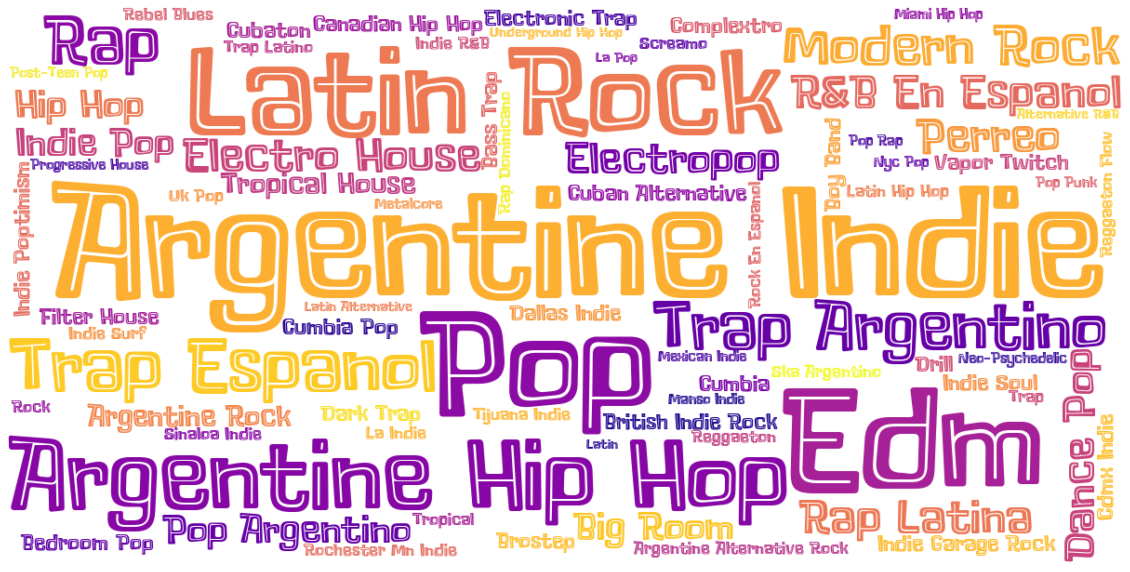

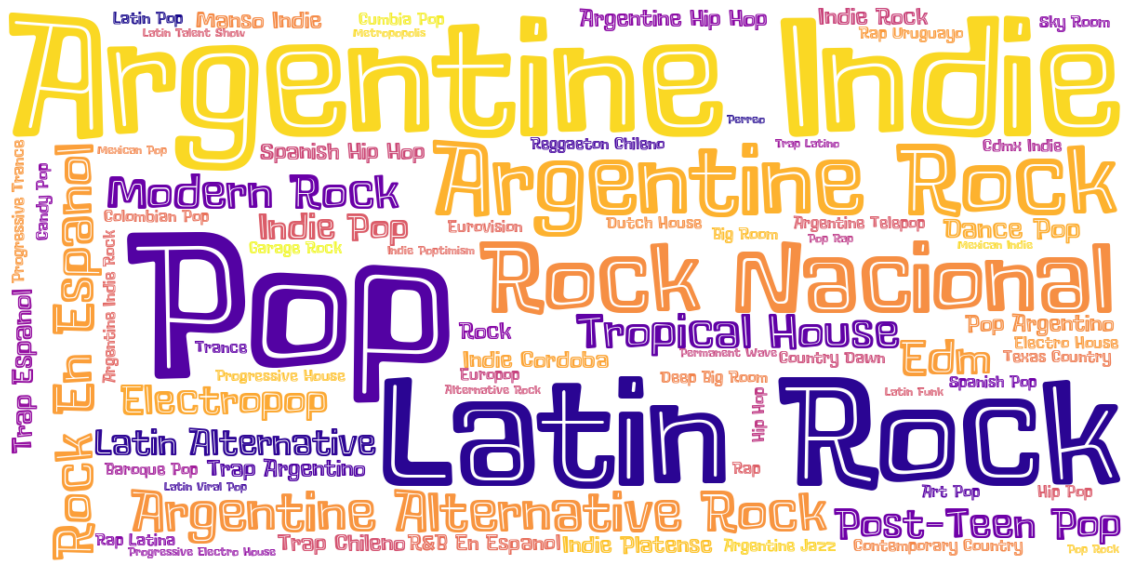

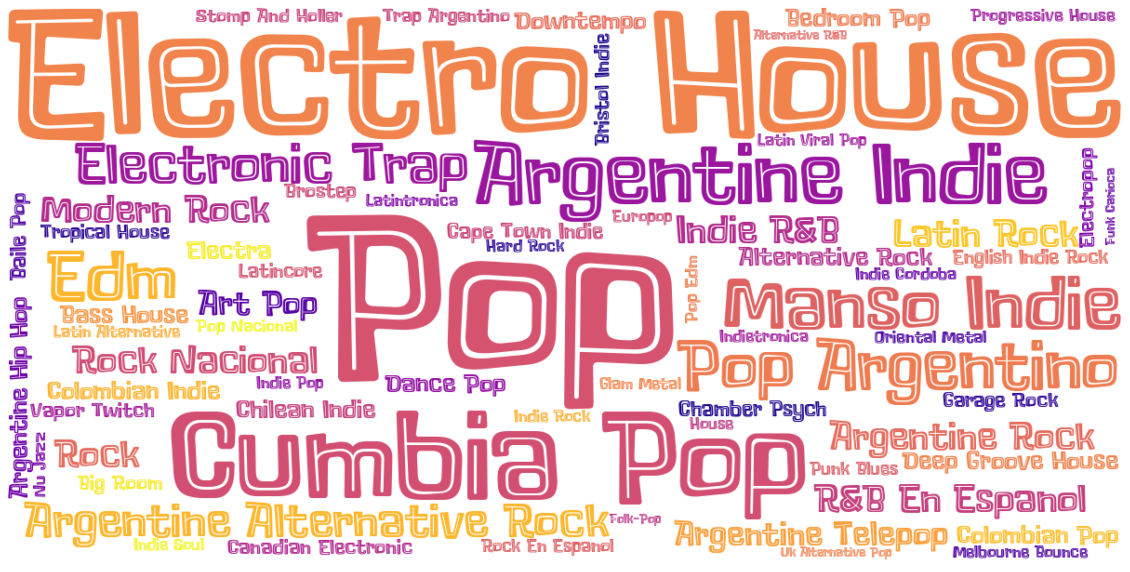

In [20]:
bar_colors = [f'rgb{str(c)}' for c in sns.color_palette(palette='plasma', n_colors=10)]
pie_colors = ['#1f77b4', 'salmon']

for day in range(1,4):
    genres_dist = df_artists.loc[df_artists['day'] == day, [col.startswith('genre:') for col in df_artists.columns]].sum()
    genres_dist = genres_dist.drop(genres_dist[genres_dist==0].index).sort_values(ascending=False).reset_index()
    genres_dist['index'] = genres_dist['index'].str.replace('genre: ','')
    genres_dist['index'] = genres_dist['index'].str.title()
    genres_dist.set_index('index', inplace=True)
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'bar'}]],
                        subplot_titles=['Argentinian artists percentage', 'Genres distribution'], column_widths=[0.3, 0.7])
    fig.add_trace(go.Pie(labels=labels,
                         values=[df_artists.loc[df_artists['day'] == day, 'is_argentinian'].mean(),
                                 1 - df_artists.loc[df_artists['day'] == day, 'is_argentinian'].mean()],
                         pull=[0.05, 0]), 1, 1)
    fig.update_traces(hoverinfo='text', textinfo='label+percent',
                  textfont_color='white',textfont_size=14, marker=dict(colors=pie_colors))
    bar_x = genres_dist.iloc[:10,:].index
    bar_y = genres_dist.iloc[:10,0]

    fig.add_trace(go.Bar(x=bar_x,
                         y=bar_y, marker_color = bar_colors, hoverinfo='x+y'),
                  row=1, col=2)
    fig.update_layout(xaxis_tickangle=45)

    fig.update_layout(showlegend=False,     
                      font=dict(size=18), plot_bgcolor='rgba(0,0,0,0)')
    fig.update_yaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray')

    fig.show()
    plotly.offline.plot(fig, filename=f'img/genres-and-arg-dist-day-{day}.html', auto_open=False);

    wordcloud = WordCloud(width=1200, height=600, colormap='plasma',
                          background_color='white', font_path='./Lolapeluza-Font/Lolapeluza-Regular.ttf',
                          collocations=False).generate_from_frequencies(genres_dist.iloc[:,0].to_dict())

    # Visualize wordcloud
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off');
    plt.savefig(fname=f'img/wordcloud-lolla-day-{day}.png', format='png', bbox_inches='tight')

Followers distribution

In [21]:
fig = go.Figure(data=[go.Histogram(x=df_artists['followers'])])
fig.update_layout(title={'text':'Followers distribution', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_yaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray', title='Frequency')
fig.show()
plotly.offline.plot(fig, filename='img/followers-distribution.html', auto_open=False);

Identify most followed artists

In [22]:
df_artists.loc[df_artists['followers'] >= 1e6, ['followers']].sort_values(by='followers')

followers
artist                            
Jaden Smith                1007728
Hayley Kiyoko              1078012
AJR                        1106332
Denzel Curry               1114682
Rels B                     1185579
Brockhampton               1186410
LP                         1445095
Vampire Weekend            1512168
A Day to Remember          1579818
Los Fabulosos Cadillacs    1672897
Rex Orange County          1737724
Cage the Elephant          1848698
Charli XCX                 1921146
R3HAB                      1945845
Lauv                       2179762
Pabllo Vittar              2621313
DUKI                       2715207
The Strokes                3019899
Armin Van Buuren           3285835
The Lumineers              3569127
Gwen Stefani               3584137
Rita Ora                   5359183
Travis Scott               7705985
Lana del Rey               9783778
Martin Garrix             12574151
Guns N’ Roses             15494663
Alan Walker               17744927

Followers distribution for those artist with less than 1M followers

In [23]:
fig = go.Figure(data=[go.Histogram(x=df_artists.loc[df_artists['followers'] < 1e6, 'followers'])])
fig.update_layout(title={'text':'Less than 1M followers distribution', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_yaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray', title='Frequency')
fig.show()
plotly.offline.plot(fig, filename='img/followers-distribution-less-1M.html', auto_open=False);

First release distribution

In [24]:
fig = go.Figure(data=[go.Histogram(x=df_artists['first_release'], xbins=dict(start=1970, end=2020, size=5))])
fig.update_layout(title={'text':'First release distribution', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(nticks=10, tickvals=list(range(1970,2021,5)),
                 ticks='outside', tickwidth=2, tickcolor='lightgray', ticklen=5)
fig.update_yaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray', title='Frequency')
fig.update_xaxes(showgrid=False, title='Year of first release')
fig.show()
plotly.offline.plot(fig, filename='img/first-release-distribution.html', auto_open=False);

Identify most veteran artists

In [25]:
df_artists.loc[df_artists['first_release'] < 1990, ['first_release', 'genres']].sort_values(by='first_release')

first_release  \
artist                                   
Litto Nebbia                      1970   
Los Fabulosos Cadillacs           1986   
Ratones Paranoicos                1986   
Guns N’ Roses                     1987   
Fabiana Cantilo                   1988   
LP                                1989   

                                                                    genres  
artist                                                                      
Litto Nebbia                               [argentine rock, rock nacional]  
Los Fabulosos Cadillacs  [argentine rock, latin alternative, latin rock...  
Ratones Paranoicos       [argentine rock, latin alternative, latin rock...  
Guns N’ Roses                                [glam metal, hard rock, rock]  
Fabiana Cantilo          [argentine rock, argentine telepop, cumbia pop...  
LP                                                                [la pop]

Genres wordcloud

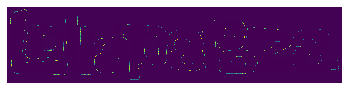

In [26]:
lolla_mask = Image.open('img/logo-lolla_clean.png')
nd_lolla_mask = (np.array(lolla_mask) > 0)*255
plt.axis('off')
plt.imshow(lolla_mask);

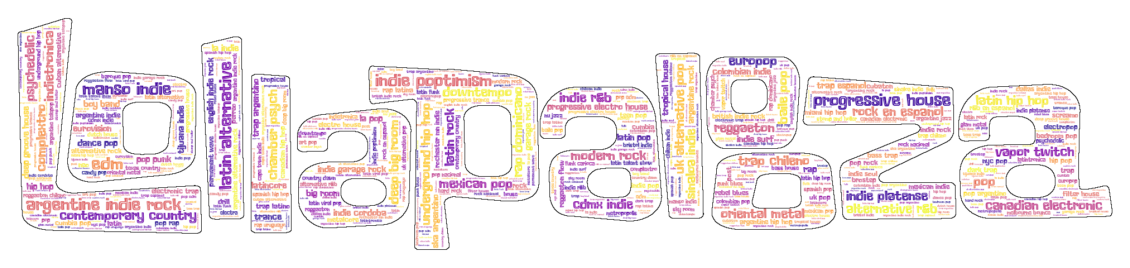

In [27]:
cv = CountVectorizer(token_pattern=r'((?:\w\s?&?)+)-?')
genres = cv.fit_transform(df_artists['genres'].map(lambda x: '-'.join(x)))
genres_freq = pd.DataFrame(genres.todense(),
                           index=df_artists.index, columns=cv.vocabulary_).T.sum(axis=1).to_dict()


# Generate wordcloud
wordcloud = WordCloud(width=1200, height=600, colormap='plasma',
                      background_color='white', font_path='./Lolapeluza-Font/Lolapeluza-Regular.ttf',
                      collocations=False, mask=nd_lolla_mask, contour_width=1, max_words = 1000, repeat=True).generate_from_frequencies(genres_freq)

# Visualize wordcloud
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.savefig(fname='img/wordcloud-lolla.png', format='png', bbox_inches='tight')

Genres wordcloud per day

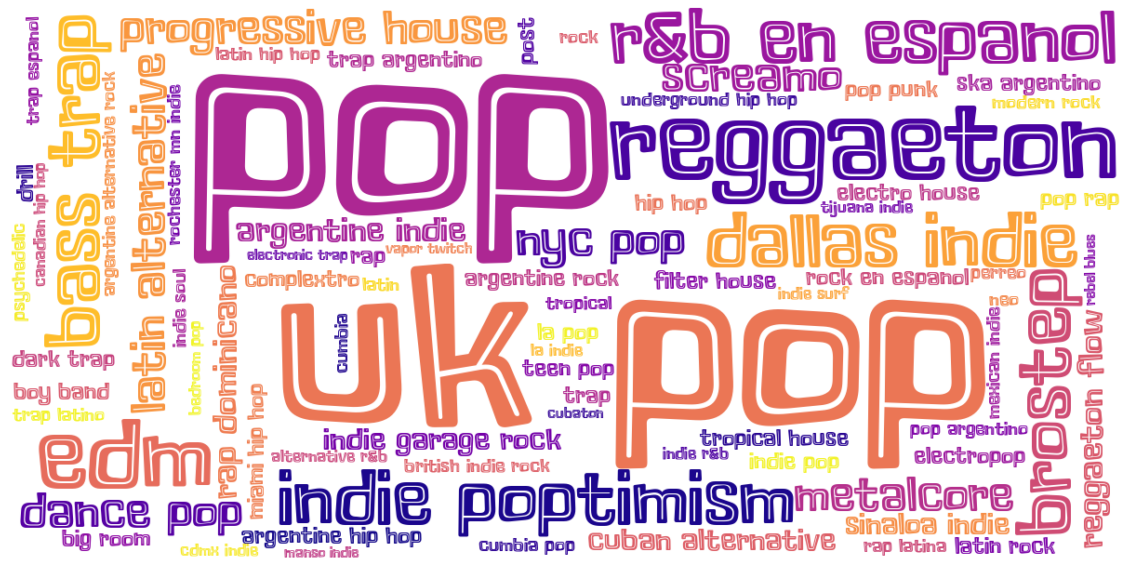

In [28]:
# Day 1
genres_day_1 = cv.fit_transform(df_artists.loc[df_artists['day'] == 1, 'genres'].map(lambda x: '-'.join(x)))
genres_day_1_freq = pd.DataFrame(genres_day_1.todense(),
                                 index=df_artists.loc[df_artists['day'] == 1].index,
                                 columns=cv.vocabulary_).T.sum(axis=1).to_dict()
# genres_day_1_freq['rap'] += 3
# genres_day_1_freq['progressive house'] += 5

# Generate wordcloud
wordcloud = WordCloud(width=1200, height=600, colormap='plasma',
                      background_color='white', font_path='./Lolapeluza-Font/Lolapeluza-Regular.ttf',
                      collocations=False).generate_from_frequencies(genres_day_1_freq)

# Visualize wordcloud
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.savefig(fname='img/wordcloud-lolla-day-1.png', format='png', bbox_inches='tight')

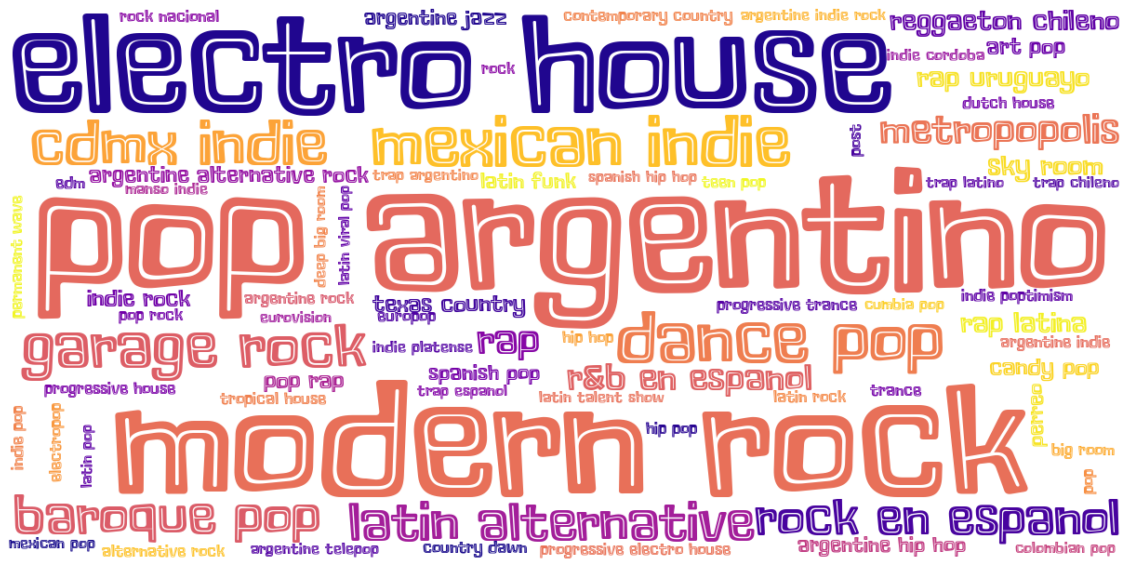

In [29]:
# Day 2
genres_day_2 = cv.fit_transform(df_artists.loc[df_artists['day'] == 2, 'genres'].map(lambda x: '-'.join(x)))
genres_day_2_freq = pd.DataFrame(genres_day_2.todense(),
                                 index=df_artists.loc[df_artists['day'] == 2].index,
                                 columns=cv.vocabulary_).T.sum(axis=1).to_dict()

# Generate wordcloud
wordcloud = WordCloud(width=1200, height=600, colormap='plasma',
                      background_color='white', font_path='./Lolapeluza-Font/Lolapeluza-Regular.ttf',
                      collocations=False).generate_from_frequencies(genres_day_2_freq)

# Visualize wordcloud
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.savefig(fname='img/wordcloud-lolla-day-2.png', format='png', bbox_inches='tight')

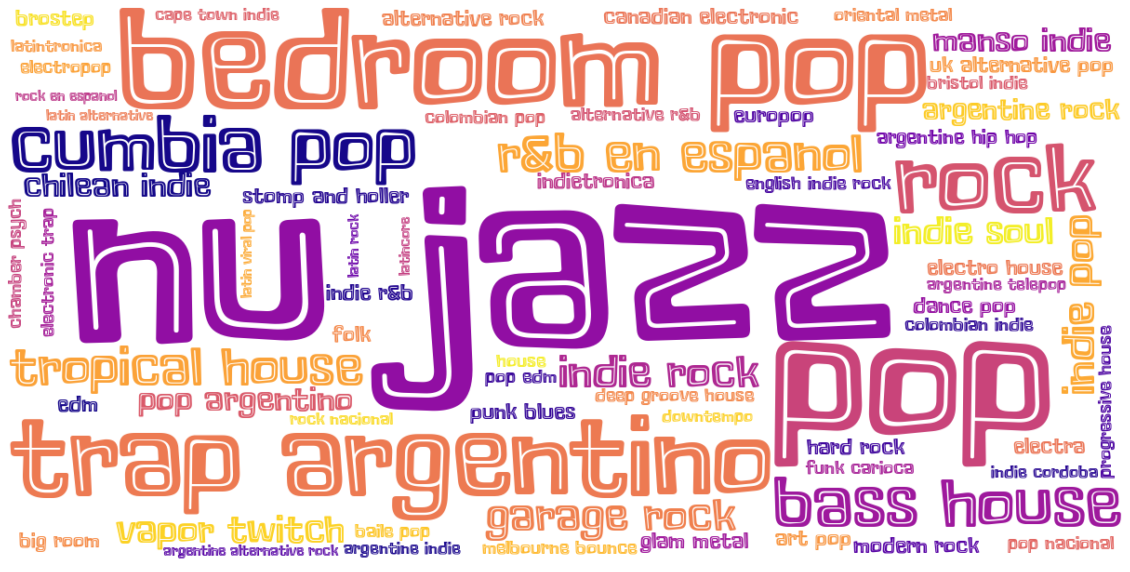

In [30]:
# Day 3
genres_day_3 = cv.fit_transform(df_artists.loc[df_artists['day'] == 3, 'genres'].map(lambda x: '-'.join(x)))
genres_day_3_freq = pd.DataFrame(genres_day_3.todense(),
                                 index=df_artists.loc[df_artists['day'] == 3].index,
                                 columns=cv.vocabulary_).T.sum(axis=1).to_dict()

# Generate wordcloud
wordcloud = WordCloud(width=1200, height=600, colormap='plasma',
                      background_color='white', font_path='./Lolapeluza-Font/Lolapeluza-Regular.ttf',
                      collocations=False).generate_from_frequencies(genres_day_3_freq)

# Visualize wordcloud
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.savefig(fname='img/wordcloud-lolla-day-3.png', format='png', bbox_inches='tight')

Analysis of tracks' audio features

In [31]:
df_tracks = pd.read_csv('tracks.csv', index_col='track')
df_tracks.head()

artist  acousticness  \
track                                                
3eekarcy7kvN4yt5ZFzltW  Travis Scott       0.05460   
7h0d2h0fUmzbs7zeFigJPn  Travis Scott       0.05670   
2xLMifQCjDGFmkHkpNLD9h  Travis Scott       0.00513   
6gBFPUFcJLzWGx4lenP6h2  Travis Scott       0.08470   
4ea9w8c4ROqiZpJVhfBA3m  Travis Scott       0.18800   

                                                             analysis_url  \
track                                                                       
3eekarcy7kvN4yt5ZFzltW  https://api.spotify.com/v1/audio-analysis/3eek...   
7h0d2h0fUmzbs7zeFigJPn  https://api.spotify.com/v1/audio-analysis/7h0d...   
2xLMifQCjDGFmkHkpNLD9h  https://api.spotify.com/v1/audio-analysis/2xLM...   
6gBFPUFcJLzWGx4lenP6h2  https://api.spotify.com/v1/audio-analysis/6gBF...   
4ea9w8c4ROqiZpJVhfBA3m  https://api.spotify.com/v1/audio-analysis/4ea9...   

                        danceability  duration_ms  energy  instrumentalness  \
track                                                                         
3eekarcy7kvN4yt5ZFzltW         0.598       175721   0.427          0.000006   
7h0d2h0fUmzbs7zeFigJPn         0.559       244874   0.491          0.000000   
2xLMifQCjDGFmkHkpNLD9h         0.834       312820   0.730          0.000000   
6gBFPUFcJLzWGx4lenP6h2         0.841       243837   0.728          0.000000   
4ea9w8c4ROqiZpJVhfBA3m         0.845       279907   0.631          0.000000   

                        key  liveness  loudness  mode  speechiness    tempo  \
track                                                                         
3eekarcy7kvN4yt5ZFzltW    7    0.2100    -8.764     0       0.0317   76.469   
7h0d2h0fUmzbs7zeFigJPn    2    0.0992    -6.406     0       0.0346  153.131   
2xLMifQCjDGFmkHkpNLD9h    8    0.1240    -3.714     1       0.2220  155.008   
6gBFPUFcJLzWGx4lenP6h2    7    0.1490    -3.370     1       0.0484  130.049   
4ea9w8c4ROqiZpJVhfBA3m    7    0.0806    -8.206     0       0.2160  111.983   

                        time_signature  \
track                                    
3eekarcy7kvN4yt5ZFzltW               4   
7h0d2h0fUmzbs7zeFigJPn               4   
2xLMifQCjDGFmkHkpNLD9h               4   
6gBFPUFcJLzWGx4lenP6h2               4   
4ea9w8c4ROqiZpJVhfBA3m               4   

                                                               track_href  \
track                                                                       
3eekarcy7kvN4yt5ZFzltW  https://api.spotify.com/v1/tracks/3eekarcy7kvN...   
7h0d2h0fUmzbs7zeFigJPn  https://api.spotify.com/v1/tracks/7h0d2h0fUmzb...   
2xLMifQCjDGFmkHkpNLD9h  https://api.spotify.com/v1/tracks/2xLMifQCjDGF...   
6gBFPUFcJLzWGx4lenP6h2  https://api.spotify.com/v1/tracks/6gBFPUFcJLzW...   
4ea9w8c4ROqiZpJVhfBA3m  https://api.spotify.com/v1/tracks/4ea9w8c4ROqi...   

                                  type                                   uri  \
track                                                                          
3eekarcy7kvN4yt5ZFzltW  audio_features  spotify:track:3eekarcy7kvN4yt5ZFzltW   
7h0d2h0fUmzbs7zeFigJPn  audio_features  spotify:track:7h0d2h0fUmzbs7zeFigJPn   
2xLMifQCjDGFmkHkpNLD9h  audio_features  spotify:track:2xLMifQCjDGFmkHkpNLD9h   
6gBFPUFcJLzWGx4lenP6h2  audio_features  spotify:track:6gBFPUFcJLzWGx4lenP6h2   
4ea9w8c4ROqiZpJVhfBA3m  audio_features  spotify:track:4ea9w8c4ROqiZpJVhfBA3m   

                        valence  
track                            
3eekarcy7kvN4yt5ZFzltW   0.0605  
7h0d2h0fUmzbs7zeFigJPn   0.1140  
2xLMifQCjDGFmkHkpNLD9h   0.4460  
6gBFPUFcJLzWGx4lenP6h2   0.4300  
4ea9w8c4ROqiZpJVhfBA3m   0.5450

Meaning of audio features that will be analyzed, according to [official documentation](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/):

- *acousticness* - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- *danceability* - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- *energy* - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- *instrumentalness* - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- *loudness* - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 dB.

- *speechiness* - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- *tempo* - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- *valence* - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry) .

Compute the mean values of each audio feature over the top tracks of an artist

In [32]:
audio_feats = ['energy', 'danceability', 'valence', 'instrumentalness', 
               'acousticness', 'speechiness', 'tempo', 'loudness']

In [33]:
artists_audio_feats = df_tracks[['artist']+audio_feats].groupby('artist').mean()
artists_audio_feats.head()

energy  danceability  valence  instrumentalness  \
artist                                                               
A Day to Remember  0.9079        0.4463  0.45260          0.000011   
AJR                0.6378        0.5945  0.55540          0.000000   
Ainda              0.2828        0.5976  0.39895          0.002467   
Airbag             0.7816        0.4371  0.40930          0.003491   
Alan Walker        0.6822        0.5669  0.34620          0.000240   

                   acousticness  speechiness     tempo  loudness  
artist                                                            
A Day to Remember      0.012092      0.09965  147.1963   -3.9737  
AJR                    0.166270      0.07905  125.0487   -5.3318  
Ainda                  0.754100      0.04014  126.8930  -11.4613  
Airbag                 0.033316      0.04284  117.2577   -4.7051  
Alan Walker            0.206840      0.05304  132.7670   -5.5393

In [34]:
artists_audio_feats.describe()

energy  danceability    valence  instrumentalness  acousticness  \
count  91.000000     91.000000  91.000000         91.000000     91.000000   
mean    0.655414      0.627016   0.475591          0.053048      0.244886   
std     0.144711      0.107899   0.153967          0.091972      0.187648   
min     0.282800      0.374500   0.197840          0.000000      0.001683   
25%     0.548600      0.549338   0.364765          0.000173      0.097138   
50%     0.679333      0.636800   0.466500          0.003491      0.182908   
75%     0.753150      0.717600   0.602950          0.075775      0.361410   
max     0.972400      0.821600   0.828500          0.415810      0.754100   

       speechiness       tempo   loudness  
count    91.000000   91.000000  91.000000  
mean      0.094060  123.348148  -6.697853  
std       0.062279   11.988642   2.013477  
min       0.029850   93.537375 -13.758400  
25%       0.045620  115.405050  -7.876450  
50%       0.079050  123.694700  -6.438667  
75%       0.121060  128.760750  -5.197900  
max       0.339620  159.842833  -3.085100

Standarize features that aren't expressed in the [0-1] range in order to plot them in the same scale

In [35]:
# Loudness values typical range between -60 and 0 db, so we take them as population min & max
loudness_scaler = MinMaxScaler()
loudness_scaler.fit([[-60], [0]])
artists_audio_feats['loudness'] = loudness_scaler.transform(artists_audio_feats[['loudness']])

In [36]:
# Tempo values typical range between 0 and 225 BPM, so we take them as population min & max
tempo_scaler = MinMaxScaler()
tempo_scaler.fit([[0], [225]])
artists_audio_feats['tempo'] = tempo_scaler.transform(artists_audio_feats[['tempo']])

In [37]:
artists_audio_feats.describe()

energy  danceability    valence  instrumentalness  acousticness  \
count  91.000000     91.000000  91.000000         91.000000     91.000000   
mean    0.655414      0.627016   0.475591          0.053048      0.244886   
std     0.144711      0.107899   0.153967          0.091972      0.187648   
min     0.282800      0.374500   0.197840          0.000000      0.001683   
25%     0.548600      0.549338   0.364765          0.000173      0.097138   
50%     0.679333      0.636800   0.466500          0.003491      0.182908   
75%     0.753150      0.717600   0.602950          0.075775      0.361410   
max     0.972400      0.821600   0.828500          0.415810      0.754100   

       speechiness      tempo   loudness  
count    91.000000  91.000000  91.000000  
mean      0.094060   0.548214   0.888369  
std       0.062279   0.053283   0.033558  
min       0.029850   0.415722   0.770693  
25%       0.045620   0.512911   0.868726  
50%       0.079050   0.549754   0.892689  
75%       0.121060   0.572270   0.913368  
max       0.339620   0.710413   0.948582

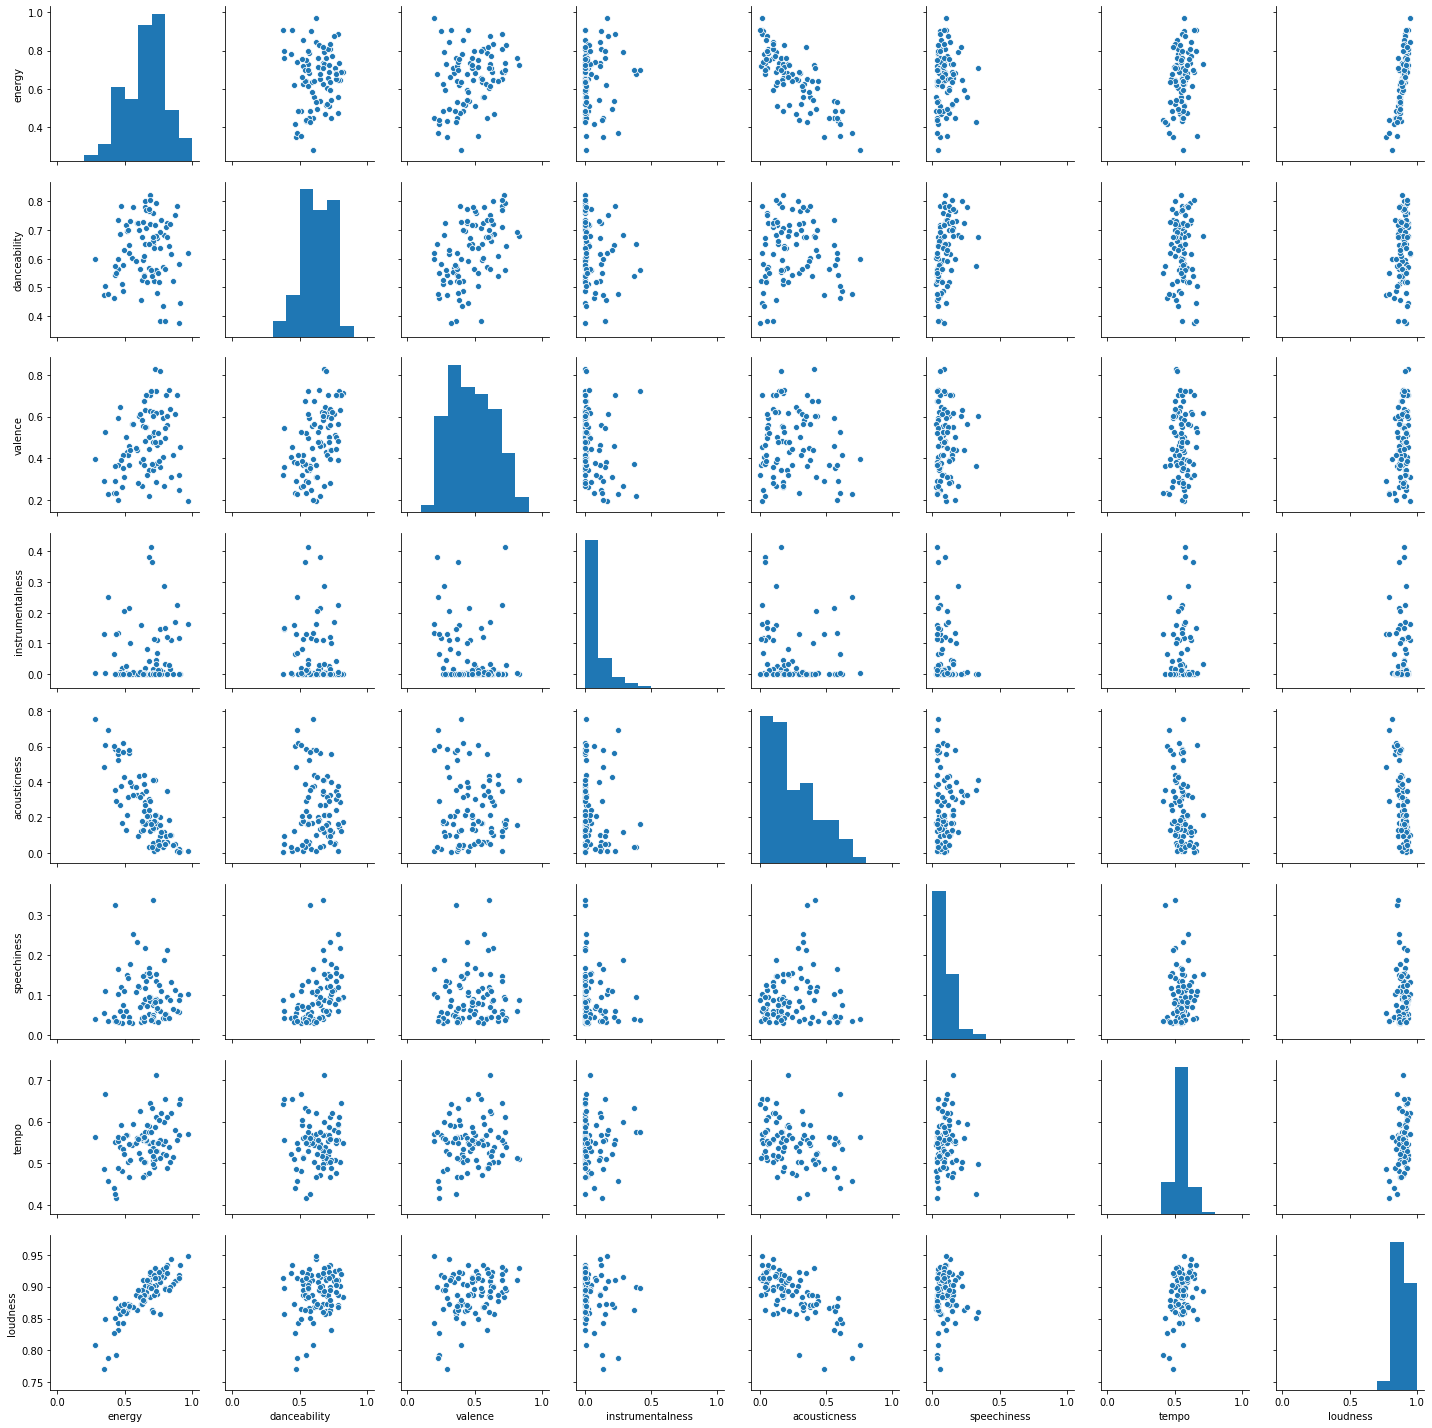

In [38]:
sns.pairplot(artists_audio_feats, diag_kws={'range':(0,1)});
plt.savefig(fname='img/audio-features-pairplot.png', format='png', bbox_inches='tight')

In [39]:
artists_audio_feats = artists_audio_feats.join(df_artists['day'])
artists_audio_feats.head()

energy  danceability  valence  instrumentalness  \
artist                                                               
A Day to Remember  0.9079        0.4463  0.45260          0.000011   
AJR                0.6378        0.5945  0.55540          0.000000   
Ainda              0.2828        0.5976  0.39895          0.002467   
Airbag             0.7816        0.4371  0.40930          0.003491   
Alan Walker        0.6822        0.5669  0.34620          0.000240   

                   acousticness  speechiness     tempo  loudness  day  
artist                                                                 
A Day to Remember      0.012092      0.09965  0.654206  0.933772    1  
AJR                    0.166270      0.07905  0.555772  0.911137    1  
Ainda                  0.754100      0.04014  0.563969  0.808978    2  
Airbag                 0.033316      0.04284  0.521145  0.921582    3  
Alan Walker            0.206840      0.05304  0.590076  0.907678    3

Audio features radar plot per day

In [40]:
hovertext_base = '<b>{}</b><br>Genres: {}<br>Day {}'
hovertext = [hovertext_base.format(name, genres, day)
             for (name, genres, day) in zip(df_artists.index,
                                            df_artists['genres'].apply(lambda x: x[:5]),
                                            df_artists['day'])]

for day in artists_audio_feats['day'].unique():
    fig = go.Figure()
    for artist in artists_audio_feats[artists_audio_feats.day == day].index:
        fig.add_trace(go.Scatterpolar(r=artists_audio_feats.loc[artist, 'energy':'loudness'],
                                      theta=artists_audio_feats.columns[:-1],
                                      hovertemplate='%{theta}: %{r:.2f}',
                                      hoverlabel=dict(namelength=-1),
                                      fill='toself',
                                      name=f'{artist}'))

    fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0,1])),
                      showlegend=True, title={'text':f'Audio features radar - Day {day}', 'x':0.5},
                      width = 1000, height = 640)

    fig.show(config=dict(displayModeBar=False))
    plotly.offline.plot(fig, filename=f'img/radar-plot-day_{day}.html', auto_open=False);
    
    # Create average radarplot
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(r=artists_audio_feats.loc[artists_audio_feats.day == day, 'energy':'loudness']\
                                                       .mean(),
                                    theta=artists_audio_feats.columns[:-1],
                                    hovertemplate='%{theta}: %{r:.2f}',
                                    fill='toself',
                                    name=f'Average Day {day}'))

    fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0,1])),
                  showlegend=True, title={'text':f'Average audio features radar - Day {day}', 'x':0.5},
                  width = 1000, height = 640)
    plotly.offline.plot(fig, filename=f'img/avg-radar-plot-day_{day}.html', auto_open=False);

For online plotting

```python
from chart_studio.tools import set_credentials_file
from chart_studio.plotly import plot
set_credentials_file(username='USERNAME', api_key='API_KEY')

fig = go.Figure()

for artist in artists_audio_feats.index:
    fig.add_trace(go.Scatterpolar(r=artists_audio_feats.loc[artist, 'energy':'loudness'],
                                  theta=artists_audio_feats.columns[:-1],
                                  hovertemplate='%{theta}: %{r:.2f}',
                                  fill='toself',
                                  name=f'{artist}'))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0,1])),
                  showlegend=True, title={'text':'Audio features radar', 'x':0.5},)

plot(fig, filename='Audio features radar')
```

---

## Artist Clustering

- Based on audio features only, using K-Means

    *Note*: this first cluster analysis is based on https://towardsdatascience.com/profiling-my-favorite-songs-on-spotify-through-clustering-33fee591783d

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ss_dist = []

K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(artists_audio_feats.loc[:, 'energy':'loudness'])
    ss_dist.append(km.inertia_.round(2))
    print(f'Silhouette score for {k} clusters:', silhouette_score(artists_audio_feats, km.labels_).round(2))

Silhouette score for 2 clusters: 0.08
Silhouette score for 3 clusters: 0.06
Silhouette score for 4 clusters: -0.01
Silhouette score for 5 clusters: -0.04
Silhouette score for 6 clusters: -0.08
Silhouette score for 7 clusters: -0.08
Silhouette score for 8 clusters: -0.09
Silhouette score for 9 clusters: -0.19
Silhouette score for 10 clusters: -0.18


Silhouette scores near or less than 1 indicate overlapping clusters or even wrong assignment of observations to clusters

In [42]:
fig = go.Figure(data=[go.Scatter(x=list(K), y=ss_dist)])
fig.update_layout(title={'text':'Elbow Method for Optimal K', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(nticks=9, ticks='outside', tickwidth=2, tickcolor='lightgray', ticklen=5, title='K')
fig.update_yaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray', title='Sum of squared distances')
fig.show()

We use the elbow method and the Silhouette score to choose *k* = 3

In [43]:
km = KMeans(n_clusters=3, random_state=123)
artists_audio_feats['cluster'] = km.fit_predict(artists_audio_feats)

# Inspect artist assigned to each cluster
for k in range(km.n_clusters):
    print(f'Cluster {k}:\n', artists_audio_feats.loc[artists_audio_feats['cluster'] == k].index, '\n')

Cluster 0:
 Index(['Airbag', 'Alan Walker', 'Cage the Elephant', 'Chris Lake', 'DABOW',
       'El Buen Salvaje', 'Elsa y Elmar', 'Emilia', 'Florian', 'Goldfish',
       'Guns N’ Roses', 'Idles', 'James Blake', 'Lana del Rey', 'Lauv', 'MIKA',
       'Masego', 'Miranda Johansen', 'Natalie Perez', 'Pabllo Vittar',
       'Perry Farrell’s Kind Heaven Orchestra', 'Rex Orange County', 'Reydel',
       'Rezz', 'San Holo', 'The Hu', 'The Lumineers', 'YSY A'],
      dtype='object', name='artist') 

Cluster 1:
 Index(['A Day to Remember', 'AJR', 'Alejo y Valentin', 'Axel Fiks', 'Bizarrap',
       'Boombox Cartel', 'Brockhampton', 'Cimafunk', 'DJ Sky', 'DUKI', 'Dani',
       'Denzel Curry', 'Feli Colina', 'Fuego', 'J mena', 'Kaydy Cain',
       'King Princess', 'LP', 'La Delio Valdez', 'Los Fabulosos Cadillacs',
       'Louta', 'Lucia Tacchetti', 'Madeon', 'Martin Garrix', 'Maye',
       'Ms Nina', 'Nathy Peluso', 'Rita Ora', 'Travis Scott', 'Two Feet',
       'WOS', 'Yungblud'],
      dtype='ob

In [44]:
artists_audio_feats.groupby('cluster').mean().loc[:, 'energy':'loudness']

energy  danceability   valence  instrumentalness  acousticness  \
cluster                                                                     
0        0.667965      0.608805  0.443726          0.076840      0.210771   
1        0.658610      0.654617  0.507160          0.030200      0.242248   
2        0.640780      0.614972  0.471785          0.055144      0.278422   

         speechiness     tempo  loudness  
cluster                                   
0           0.079371  0.556030  0.886070  
1           0.114766  0.542985  0.893768  
2           0.085953  0.546552  0.884873

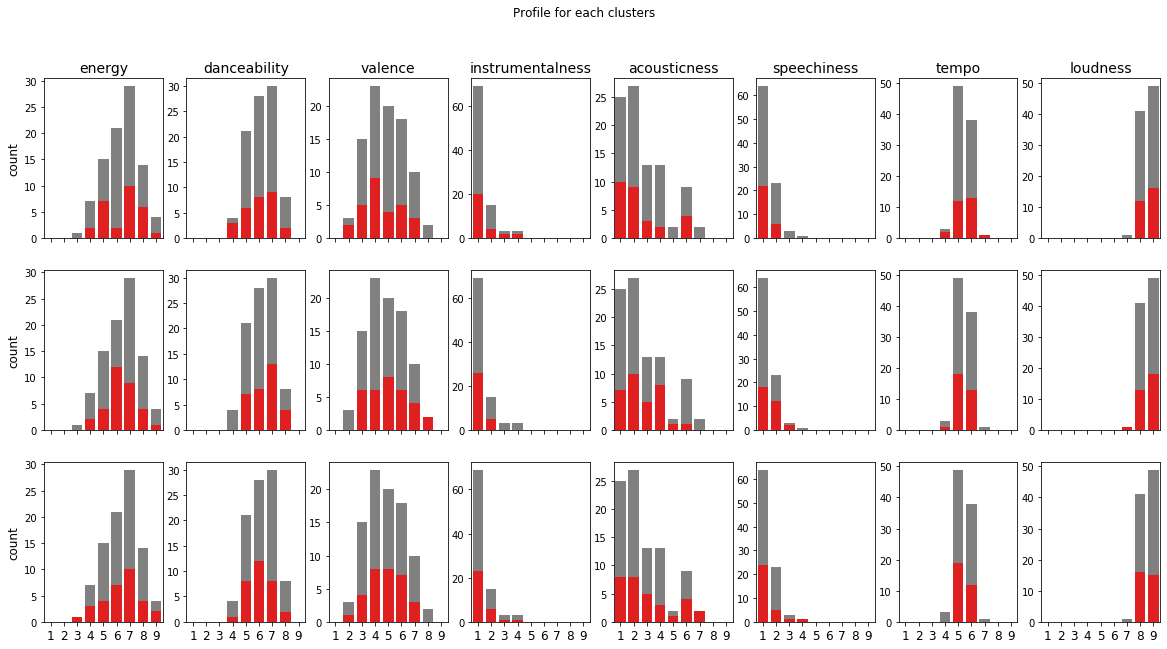

In [45]:
# set binning intervals of 0.1
bins = np.linspace(0, 1, 10)

# create subplots for number of clusters(Rows) and features(Cols)
num_clusters = km.n_clusters
num_features = len(audio_feats)

f, axes = plt.subplots(num_clusters, num_features, 
                       figsize=(20, 10), sharex='col')

# initialise 1st row. Representing cluster
row = 0

for cluster in np.sort(artists_audio_feats['cluster'].unique()):

    # filter cluster dataframe and reset column to 0 for 1st plot for the cluster
    df_cluster = artists_audio_feats[artists_audio_feats['cluster'] == cluster]
    col = 0
    
    for feature in audio_feats:
        # create binned count for all artist df and clustered df
        art_grp = artists_audio_feats.groupby(pd.cut(artists_audio_feats[feature], bins))\
                                     .size().reset_index(name='count')
        cluster_grp = df_cluster.groupby(pd.cut(df_cluster[feature], bins)).size().reset_index(name='count')
        
        # plot overall distribution and cluster distribution on the ax
        sns.barplot(data=art_grp, x=feature, y='count', 
                    color='grey', ax=axes[row, col])
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='red', ax=axes[row, col])
        
        # configure ax
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1,10), fontsize=12)
        if col > 0:
            axes[row, col].set_ylabel('')
        else:
            axes[row, col].set_ylabel('count', fontsize=12)
        if row == 0:
            axes[row, col].set_title(feature, fontsize=14)        
        col += 1
    row += 1
    
f.suptitle('Profile for each clusters')
plt.show()

Given that distributions don't differ too much across clusters, it seems that we can not segment artist properly based solely on their top tracks' audio features.

- Based on genres, related genres and nationality, using hierarchical clustering

In [46]:
rel_artist_cols = [rel_artist for rel_artist in df_artists.columns if 'related_artist:' in rel_artist]
cluster_data = df_artists.drop(['artist_id', 'followers', 'popularity', 'albums',
                                'genres', 'related_artists', 'related_genres', 'day',
                                'first_release', 'top_tracks'] + rel_artist_cols, axis=1)

In [47]:
cluster_data.head()

genre: alternative r&b  genre: alternative rock  \
artist                                                                     
Travis Scott                                  0                        0   
Martin Garrix                                 0                        0   
Los Fabulosos Cadillacs                       0                        0   
Brockhampton                                  0                        0   
DUKI                                          0                        0   

                         genre: argentine alternative rock  \
artist                                                       
Travis Scott                                             0   
Martin Garrix                                            0   
Los Fabulosos Cadillacs                                  0   
Brockhampton                                             0   
DUKI                                                     0   

                         genre: argentine hip hop  genre: argentine indie  \
artist                                                                      
Travis Scott                                    0                       0   
Martin Garrix                                   0                       0   
Los Fabulosos Cadillacs                         0                       0   
Brockhampton                                    0                       0   
DUKI                                            1                       0   

                         genre: argentine indie rock  genre: argentine jazz  \
artist                                                                        
Travis Scott                                       0                      0   
Martin Garrix                                      0                      0   
Los Fabulosos Cadillacs                            0                      0   
Brockhampton                                       0                      0   
DUKI                                               0                      0   

                         genre: argentine rock  genre: argentine telepop  \
artist                                                                     
Travis Scott                                 0                         0   
Martin Garrix                                0                         0   
Los Fabulosos Cadillacs                      1                         0   
Brockhampton                                 0                         0   
DUKI                                         0                         0   

                         genre: art pop  ...  related_genre: bboy  \
artist                                   ...                        
Travis Scott                          0  ...                  0.0   
Martin Garrix                         0  ...                  0.0   
Los Fabulosos Cadillacs               0  ...                  0.0   
Brockhampton                          0  ...                  0.0   
DUKI                                  0  ...                  0.0   

                         related_genre: electro swing  \
artist                                                  
Travis Scott                                      0.0   
Martin Garrix                                     0.0   
Los Fabulosos Cadillacs                           0.0   
Brockhampton                                      0.0   
DUKI                                              0.0   

                         related_genre: south african hip hop  \
artist                                                          
Travis Scott                                              0.0   
Martin Garrix                                             0.0   
Los Fabulosos Cadillacs                                   0.0   
Brockhampton                                              0.0   
DUKI                                                      0.0   

                         related_genre: nu disco  related_genre: filter house  \
artist   

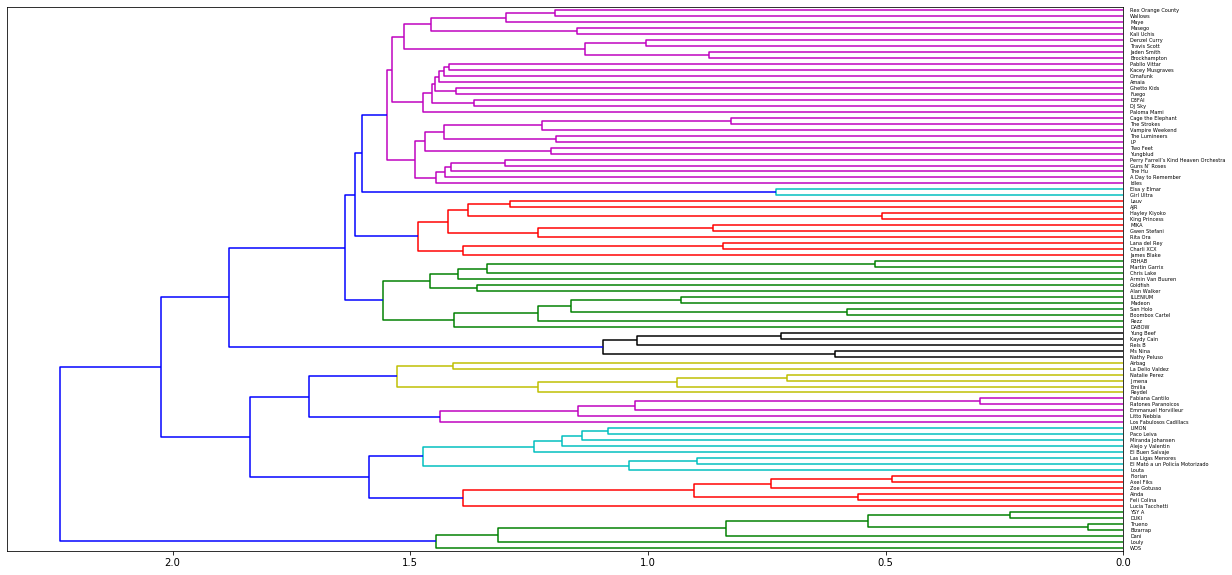

In [48]:
scaler = StandardScaler()
cluster_data_std = scaler.fit_transform(cluster_data)
dist_std =  1 - cosine_similarity(cluster_data_std)

Z = linkage(dist_std, method='average')

plt.figure(figsize=(20,10))
dendrogram(Z, labels=df_artists.index, orientation='left')
plt.savefig('img/dendrogram_std.svg');

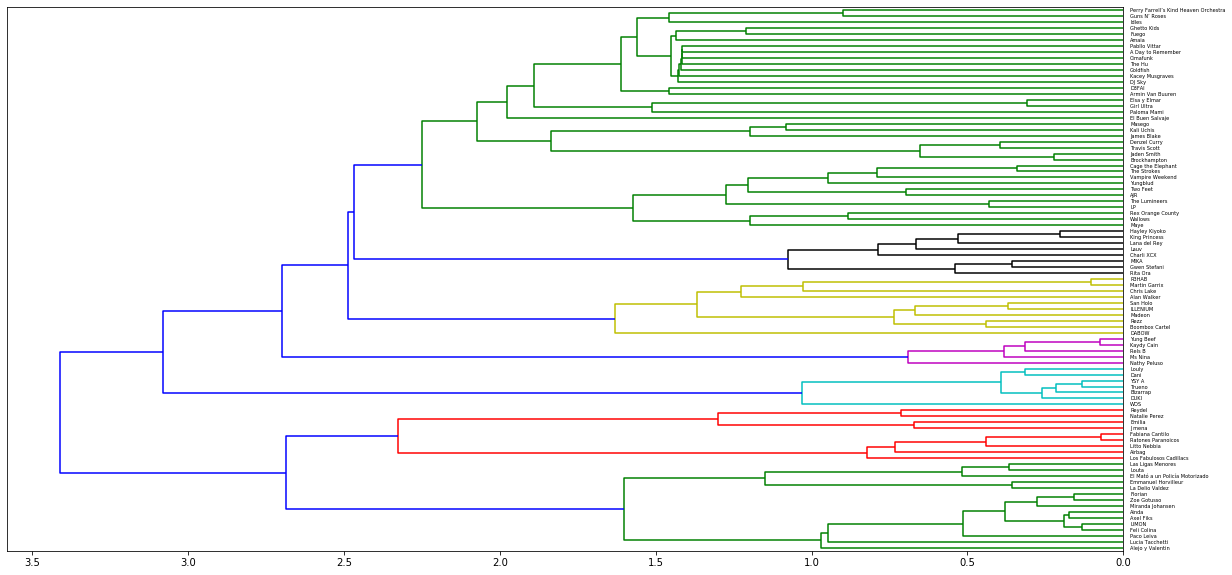

In [49]:
normalizer = Normalizer()
cluster_data_l2 = normalizer.fit_transform(cluster_data)
dist_l2  =  1 - cosine_similarity(cluster_data_l2)

Z = linkage(dist_l2, method='average')

plt.figure(figsize=(20,10))
dendrogram(Z, labels=df_artists.index, orientation='left')
plt.savefig('img/dendrogram_l2.svg');

Even though we get similar results with both standarization techniques, preprocessing with L2 normalization seems to provide a more legible dendrogram in which we identify the following clusters (from bottom to top):

1. Argentinian indie
2. Argentinian rock & pop
3. Argentinian trap
4. Latin trap
5. EDM & house
6. International pop
7. International indie & modern rock
8. Hip hop & rap
9. Art pop & R&B
10. Noise

What we call noise in this case correspond to minority genres (like hard rock, screamo or nu jazz), or artist that we would have expected to see assigned to other clusters (such as Armin van Buuren -near other EDM & house artists- or Fuego -latin trap-).

- Based on every feature, using dimensionality reduction first and then DBSCAN over the results

In [50]:
cluster_data = df_artists.drop(['artist_id', 'followers', 'popularity', 'albums',
                                'genres', 'related_artists', 'related_genres', 'day',
                                'first_release', 'top_tracks'], axis=1)\
                         .join(artists_audio_feats.loc[:, 'energy':'loudness'])

In [51]:
cluster_data.head()

genre: alternative r&b  genre: alternative rock  \
artist                                                                     
Travis Scott                                  0                        0   
Martin Garrix                                 0                        0   
Los Fabulosos Cadillacs                       0                        0   
Brockhampton                                  0                        0   
DUKI                                          0                        0   

                         genre: argentine alternative rock  \
artist                                                       
Travis Scott                                             0   
Martin Garrix                                            0   
Los Fabulosos Cadillacs                                  0   
Brockhampton                                             0   
DUKI                                                     0   

                         genre: argentine hip hop  genre: argentine indie  \
artist                                                                      
Travis Scott                                    0                       0   
Martin Garrix                                   0                       0   
Los Fabulosos Cadillacs                         0                       0   
Brockhampton                                    0                       0   
DUKI                                            1                       0   

                         genre: argentine indie rock  genre: argentine jazz  \
artist                                                                        
Travis Scott                                       0                      0   
Martin Garrix                                      0                      0   
Los Fabulosos Cadillacs                            0                      0   
Brockhampton                                       0                      0   
DUKI                                               0                      0   

                         genre: argentine rock  genre: argentine telepop  \
artist                                                                     
Travis Scott                                 0                         0   
Martin Garrix                                0                         0   
Los Fabulosos Cadillacs                      1                         0   
Brockhampton                                 0                         0   
DUKI                                         0                         0   

                         genre: art pop  ...  related_genre: latincore  \
artist                                   ...                             
Travis Scott                          0  ...                       0.0   
Martin Garrix                         0  ...                       0.0   
Los Fabulosos Cadillacs               0  ...                       0.0   
Brockhampton                          0  ...                       0.0   
DUKI                                  0  ...                       0.0   

                         is_argentinian  energy  danceability  valence  \
artist                                                                   
Travis Scott                          0  0.5976        0.7246  0.28055   
Martin Garrix                         0  0.6256        0.5256  0.26740   
Los Fabulosos Cadillacs               1  0.7631        0.6917  0.81630   
Brockhampton                          0  0.6064        0.7011  0.60480   
DUKI                                  1  0.6837        0.7668  0.50480   

                         instrumentalness  acousticness  speechiness  \
artist                                                                 
Travis Scott                 2.527000e-06      0.095463      0.12278   
Martin Garrix                1.121700e-05      0.176850      0.04220   
Los Fabulosos Cadillacs      5.206087e-03      0.157502      0.05998   
Brockhampton                 5.0

Dimensionality reduction

In [52]:
cluster_data_l2 = normalizer.fit_transform(cluster_data)

In [53]:
# Isomap

iso = Isomap()
iso_plot = iso.fit_transform(cluster_data_l2)

hovertext_base = '<b>{}</b><br>Genres: {}<br>Day {}'
hovertext = [hovertext_base.format(name, genres, day)
             for (name, genres, day) in zip(df_artists.index,
                                            df_artists['genres'].apply(lambda x: x[:5]),
                                            df_artists['day'])]

fig = go.Figure(data=go.Scatter(x=iso_plot[:, 0], y=iso_plot[:, 1], mode='markers',
                hoverinfo='text', hovertext=hovertext))
fig.update_layout(title={'text':'Isomap visualization', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray', zerolinecolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray', zerolinecolor='lightgray')
fig.show()

In [54]:
# t-SNE
tsne = TSNE(random_state=123)
tsne_plot = tsne.fit_transform(cluster_data_l2)

hovertext_base = '<b>{}</b><br>Genres: {}<br>Day {}'
hovertext = [hovertext_base.format(name, genres, day)
             for (name, genres, day) in zip(df_artists.index,
                                            df_artists['genres'].apply(lambda x: x[:5]),
                                            df_artists['day'])]

fig = go.Figure(data=go.Scatter(x=tsne_plot[:, 0], y=tsne_plot[:, 1], mode='markers',
                hoverinfo='text', hovertext=hovertext))
fig.update_layout(title={'text':'t-SNE visualization', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray', zerolinecolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray', zerolinecolor='lightgray')
fig.show()

t-SNE gives us a better representation of the data in a two-dimensional space, so we are going to run DBSCAN over it's results. We'll choose a value of *eps* hyperparameter discretionally based on the k-NN distance "knee" method.

In [55]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(tsne_plot)
distances, indices = nbrs.kneighbors(tsne_plot)
distances = np.sort(distances, axis=0)
distances = distances[:,2]

In [56]:
fig = go.Figure(data=go.Scatter(x=list(range(len(distances))), y=distances))
fig.update_layout(title={'text':'k-NN distance', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=.5, gridcolor='lightgray')
fig.show()

In [57]:
dbscan = DBSCAN(eps=15.65, min_samples=3)
dbscan.fit(tsne_plot)
print('Found {} clusters'.format(len(np.unique(dbscan.labels_))-1))

Found 9 clusters


In [58]:
data = []
hovertext_base = '<b>{}</b><br>Genres: {}<br>Day {}'

for label in np.unique(dbscan.labels_):
    trace = go.Scatter(x=tsne_plot[dbscan.labels_ == label, 0], y=tsne_plot[dbscan.labels_ == label,1], 
                       mode='markers',
                       hoverinfo='text',
                       hovertext=[hovertext_base.format(name, genres, day)
                                  for (name, genres, day) in zip(df_artists[dbscan.labels_==label].index,

                                                                 df_artists[dbscan.labels_==label]['genres']\
                                                                                  .apply(lambda x: x[:5]),
                                                                 df_artists[dbscan.labels_==label]['day'])],
                       
                       name = 'Noise' if label == -1 else f'Cluster {label}')
    data.append(trace)

fig = go.Figure(data=data)
fig.update_layout(title={'text':'Artist clusters', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(range=[-120,120], showgrid=False, zeroline=False, showticklabels=False)
fig.update_yaxes(range=[-120,120], gridwidth=.15, gridcolor='lightgray', zeroline=False, showticklabels=False)
fig.show()

DBSCAN over t-SNE's dimensionality reduction performed over the whole set of features gives us the best clusters we've obtained so far. These clusters are similar to those provided by hierarchical clustering, but there's less noise and the visual representation makes it easier to interpret.

In order to segment the argentinian indie & rock musician, we'll run K-Means over them to seek more granularity.

In [59]:
clusters = pd.DataFrame(tsne_plot, columns=['tsne_0', 'tsne_1'], index=cluster_data.index)
clusters['cluster'] = dbscan.labels_
clusters.head()

tsne_0     tsne_1  cluster
artist                                                
Travis Scott            -49.622486 -63.165020        0
Martin Garrix            23.056034  46.405689        1
Los Fabulosos Cadillacs -27.807325  33.983185        2
Brockhampton            -33.395466 -67.094887        0
DUKI                     84.602455 -40.784866        3

In [60]:
km = KMeans(n_clusters=2, random_state=123)
km.fit(clusters.loc[clusters['cluster'] == 2], ['tsne_0', 'tsne_1'])
list(zip(clusters.loc[clusters['cluster'] == 2].index, km.labels_))

[('Los Fabulosos Cadillacs', 0),
 ('Louta', 1),
 ('La Delio Valdez', 0),
 ('Feli Colina', 1),
 ('Axel Fiks', 1),
 ('Lucia Tacchetti', 1),
 ('Alejo y Valentin', 1),
 ('Ratones Paranoicos', 0),
 ('Litto Nebbia', 0),
 ('El Mató a un Policía Motorizado', 0),
 ('Emmanuel Horvilleur', 0),
 ('Fabiana Cantilo', 0),
 ('Zoe Gotusso', 1),
 ('Las Ligas Menores', 1),
 ('Ainda', 1),
 ('Paco Leiva', 1),
 ('LIMON', 1),
 ('Airbag', 0),
 ('Florian', 1),
 ('Miranda Johansen', 1),
 ('El Buen Salvaje', 1)]

In [61]:
clusters.loc[clusters['cluster'] == 2, 'cluster'] =\
clusters.loc[clusters['cluster'] == 2, 'cluster'].astype(str) + '-' + (km.labels_.astype(str))

Map labels to cluster names

In [62]:
clusters['cluster_name'] = clusters['cluster'].map({0:'Hip hop & rap',
                                                    1:'EDM & house',
                                                    '2-0': 'Argentinian rock',
                                                    '2-1':'Argentinian indie',
                                                    3:'Argentinian trap',
                                                    4:'International pop', 
                                                    5:'International indie & rock',
                                                    6:'Latin trap',
                                                    7:'Argentinian pop',
                                                    8:'Art pop & R&B', 
                                                    -1: 'Undetermined'})

clusters.head()

tsne_0     tsne_1 cluster      cluster_name
artist                                                                 
Travis Scott            -49.622486 -63.165020       0     Hip hop & rap
Martin Garrix            23.056034  46.405689       1       EDM & house
Los Fabulosos Cadillacs -27.807325  33.983185     2-0  Argentinian rock
Brockhampton            -33.395466 -67.094887       0     Hip hop & rap
DUKI                     84.602455 -40.784866       3  Argentinian trap

Final clusters plot

In [63]:
clusters['followers'] = df_artists['followers']
data = []
hovertext_base = '<b>{}</b><br>Genres: {}<br>Day {}'

for cluster in clusters['cluster_name'].unique():
    trace = go.Scatter(x=clusters.loc[clusters['cluster_name'] == cluster, 'tsne_0'],
                       y=clusters.loc[clusters['cluster_name'] == cluster, 'tsne_1'],
                       mode='markers',
                       marker=dict(size=clusters.loc[clusters['cluster_name'] == cluster, 'followers'],
                                   sizemode='area',
                                   sizeref=2.*max(clusters.loc[clusters['cluster_name'] == cluster,
                                                                                           'followers'])/(40**2),
                                   sizemin=3.5,
                                   opacity=0.5),
                       hoverinfo='text',
                       hovertext=[hovertext_base.format(name, genres, day)
                                 for (name, genres, day)
                                 in zip(df_artists[clusters['cluster_name']==cluster].index,
                                        df_artists[clusters['cluster_name']==cluster]['genres']\
                                                .apply(lambda x: x[:5]),
                                        df_artists[clusters['cluster_name']==cluster]['day'])],
                       
                       name = f'{cluster}')
    data.append(trace)

fig = go.Figure(data=data)
fig.update_layout(title={'text':'Lollapalooza Argentina 2020 - Artists clusters', 'x':0.5}, plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(range=[-120,120], showgrid=False, zeroline=False, showticklabels=False)
fig.update_yaxes(range=[-120,120], gridwidth=.15, gridcolor='lightgray', zeroline=False, showticklabels=False)
fig.show()
plotly.offline.plot(fig, filename=f'img/clusters.html', auto_open=False);

For online plotting

```python
from chart_studio.tools import set_credentials_file
from chart_studio.plotly import plot
set_credentials_file(username='USERNAME', api_key='API_KEY')

data = []
hovertext_base = '<b>{}</b><br>Genres: {}<br>Day {}'

for cluster in clusters['cluster_name'].unique():
    trace = go.Scatter(x=clusters.loc[clusters['cluster_name'] == cluster, 'tsne_0'],
                       y=clusters.loc[clusters['cluster_name'] == cluster, 'tsne_1'],
                       mode='markers',
                       marker=dict(size=clusters.loc[clusters['cluster_name'] == cluster, 'followers'],
                                   sizemode='area',
                                   sizeref=2.*max(clusters.loc[clusters['cluster_name'] == cluster,
                                                                                           'followers'])/(40**2),
                                   sizemin=3.5,
                                   opacity=0.5),
                       hoverinfo='text',
                       hovertext=[hovertext_base.format(name, genres, day)
                                 for (name, genres, day)
                                 in zip(df_artists[clusters['cluster_name']==cluster].index,
                                        df_artists[clusters['cluster_name']==cluster]['genres']\
                                                .apply(lambda x: x[:5]),
                                        df_artists[clusters['cluster_name']==cluster]['day'])],
                       
                       name = f'{cluster}')
    data.append(trace)

fig = go.Figure(data=data)
fig.update_layout(title={'text':'Lollapalooza Argentina 2020 - Artists clusters', 'x':0.5},
                  plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(range=[-120,120], showgrid=False, zeroline=False, showticklabels=False)
fig.update_yaxes(range=[-120,120], gridwidth=.15, gridcolor='lightgray', zeroline=False, showticklabels=False)
plot(fig, filename='Lollapalooza Argentina 2020 - Artists clusters');
```

In [65]:
clusters.to_csv('clusters.csv')